### 라이브러리 & 설정

In [ ]:
# !pip install optuna

In [6]:
import warnings
warnings.filterwarnings('ignore')

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import optuna

# 옵션 설정
pd.set_option("display.max_columns", None)

#### LightGBM, XGBoost, CatBoost, HistGradientBoosting

- 하이퍼파라미터 최적화 (GridSearchCV vs Optuna)

| 항목             | GridSearchCV                        | Optuna (Bayesian / TPE)                      |
| -------------- | ----------------------------------- | -------------------------------------------- |
| **탐색 방식**      | **모든 조합 전수 탐색** | **스마트 탐색** (이전 실험 결과를 기반으로 promising 영역만 탐색) |
| **속도**         | 조합이 많을수록 매우 느림 (시간 폭발)              | 훨씬 빠름 — 같은 시간 내 더 많은 파라미터 조합 시도              |
| **하이퍼파라미터 범위** | 반드시 명시적으로 지정 (ex: [3, 5, 7])        | 범위를 연속적으로 지정 가능 (ex: 3~10 사이에서 float 샘플링)    |
| **연속형 변수 탐색**  | 지원하지만 Grid 간격은 직접 설정해야 함            | 자동으로 연속 공간 탐색 → 더 정밀                         |
| **탐색 효율**      | 비효율적 (불필요한 조합도 모두 학습)               | 점점 좋은 후보 쪽으로 집중 탐색                           |
| **병렬화**        | 기본적으로 지원                            | 지원 + 분산 최적화 가능                               |
| **고차원 공간**     | 조합 폭발 → 실행 불가 수준                    | 적은 trial 수로도 괜찮은 성능 가능                       |


[I 2025-09-26 20:38:05,914] A new study created in memory with name: no-name-30b42c41-63c9-41b2-a017-b27a6f7714b6
[I 2025-09-26 20:38:06,075] Trial 0 finished with value: 0.4375 and parameters: {'learning_rate': 0.1254537684871454, 'max_depth': 5, 'n_estimators': 217, 'num_leaves': 62, 'subsample': 0.9941543133628543, 'colsample_bytree': 0.965492143296143}. Best is trial 0 with value: 0.4375.



튜닝 시작: LightGBM


[I 2025-09-26 20:38:06,602] Trial 1 finished with value: 0.34375 and parameters: {'learning_rate': 0.14420043732182108, 'max_depth': 8, 'n_estimators': 430, 'num_leaves': 46, 'subsample': 0.8447389936881833, 'colsample_bytree': 0.7365664187659103}. Best is trial 0 with value: 0.4375.
[I 2025-09-26 20:38:06,981] Trial 2 finished with value: 0.3568075117370892 and parameters: {'learning_rate': 0.17723917359812072, 'max_depth': 8, 'n_estimators': 500, 'num_leaves': 17, 'subsample': 0.8278572823925809, 'colsample_bytree': 0.9958150177166971}. Best is trial 0 with value: 0.4375.
[I 2025-09-26 20:38:07,317] Trial 3 finished with value: 0.4 and parameters: {'learning_rate': 0.2197950698852694, 'max_depth': 6, 'n_estimators': 331, 'num_leaves': 29, 'subsample': 0.9687133156034288, 'colsample_bytree': 0.7008695585753943}. Best is trial 0 with value: 0.4375.
[I 2025-09-26 20:38:08,041] Trial 4 finished with value: 0.275 and parameters: {'learning_rate': 0.2763183020925972, 'max_depth': 7, 'n_est

LightGBM Best params: {'learning_rate': 0.14268861851894205, 'max_depth': 4, 'n_estimators': 430, 'num_leaves': 53, 'subsample': 0.7853181960630116, 'colsample_bytree': 0.7368118900975352}

튜닝 시작: XGBoost


[I 2025-09-26 20:38:14,212] Trial 0 finished with value: 0.3411764705882353 and parameters: {'learning_rate': 0.04346270110310488, 'max_depth': 9, 'n_estimators': 163, 'subsample': 0.9080918326905648, 'colsample_bytree': 0.9122537058268048}. Best is trial 0 with value: 0.3411764705882353.
[I 2025-09-26 20:38:14,341] Trial 1 finished with value: 0.40707964601769914 and parameters: {'learning_rate': 0.04774578139265731, 'max_depth': 3, 'n_estimators': 370, 'subsample': 0.8800069043682863, 'colsample_bytree': 0.7141761462876529}. Best is trial 1 with value: 0.40707964601769914.
[I 2025-09-26 20:38:14,659] Trial 2 finished with value: 0.3372093023255814 and parameters: {'learning_rate': 0.04138678380108421, 'max_depth': 6, 'n_estimators': 490, 'subsample': 0.7061912318002028, 'colsample_bytree': 0.8514453464043524}. Best is trial 1 with value: 0.40707964601769914.
[I 2025-09-26 20:38:14,770] Trial 3 finished with value: 0.4072398190045249 and parameters: {'learning_rate': 0.273270415653542

XGBoost Best params: {'learning_rate': 0.1782874306186556, 'max_depth': 4, 'n_estimators': 315, 'subsample': 0.9846213875720073, 'colsample_bytree': 0.8897146997897604}

튜닝 시작: CatBoost


[I 2025-09-26 20:38:19,888] Trial 0 finished with value: 0.39823008849557523 and parameters: {'learning_rate': 0.0864921349462967, 'depth': 5, 'iterations': 214, 'subsample': 0.9073166092781633, 'l2_leaf_reg': 7.6352505752588575}. Best is trial 0 with value: 0.39823008849557523.
[I 2025-09-26 20:38:21,484] Trial 1 finished with value: 0.3781094527363184 and parameters: {'learning_rate': 0.04250693406942357, 'depth': 8, 'iterations': 358, 'subsample': 0.9568073038454888, 'l2_leaf_reg': 8.489977425746911}. Best is trial 0 with value: 0.39823008849557523.
[I 2025-09-26 20:38:24,803] Trial 2 finished with value: 0.325 and parameters: {'learning_rate': 0.24919852962842393, 'depth': 9, 'iterations': 493, 'subsample': 0.8565874078105604, 'l2_leaf_reg': 1.7858454178839018}. Best is trial 0 with value: 0.39823008849557523.
[I 2025-09-26 20:38:25,100] Trial 3 finished with value: 0.32786885245901637 and parameters: {'learning_rate': 0.017221404461122646, 'depth': 3, 'iterations': 167, 'subsample

CatBoost Best params: {'learning_rate': 0.29438552805043994, 'depth': 3, 'iterations': 149, 'subsample': 0.7119681108014325, 'l2_leaf_reg': 4.411396818606022}
0:	learn: 0.6446992	total: 1.95ms	remaining: 288ms
1:	learn: 0.6214318	total: 3.86ms	remaining: 283ms
2:	learn: 0.6088946	total: 5.46ms	remaining: 266ms
3:	learn: 0.6022019	total: 7.12ms	remaining: 258ms
4:	learn: 0.5987441	total: 8.54ms	remaining: 246ms
5:	learn: 0.5966395	total: 10.2ms	remaining: 242ms
6:	learn: 0.5947306	total: 11.8ms	remaining: 240ms
7:	learn: 0.5929615	total: 13.7ms	remaining: 241ms
8:	learn: 0.5911563	total: 14.9ms	remaining: 232ms
9:	learn: 0.5905372	total: 16.2ms	remaining: 225ms
10:	learn: 0.5894673	total: 17.5ms	remaining: 220ms
11:	learn: 0.5888208	total: 18.9ms	remaining: 216ms
12:	learn: 0.5883308	total: 20.2ms	remaining: 211ms
13:	learn: 0.5878317	total: 21.3ms	remaining: 205ms
14:	learn: 0.5875065	total: 22.9ms	remaining: 205ms
15:	learn: 0.5868478	total: 24.4ms	remaining: 203ms
16:	learn: 0.586286

[I 2025-09-26 20:38:40,799] A new study created in memory with name: no-name-b7835907-d31c-46c1-ad93-b85203b5f5bd


108:	learn: 0.5384512	total: 174ms	remaining: 63.7ms
109:	learn: 0.5384087	total: 175ms	remaining: 62.2ms
110:	learn: 0.5380382	total: 177ms	remaining: 60.5ms
111:	learn: 0.5375440	total: 178ms	remaining: 58.9ms
112:	learn: 0.5371430	total: 180ms	remaining: 57.2ms
113:	learn: 0.5367068	total: 181ms	remaining: 55.6ms
114:	learn: 0.5362085	total: 182ms	remaining: 53.9ms
115:	learn: 0.5356119	total: 184ms	remaining: 52.3ms
116:	learn: 0.5352064	total: 185ms	remaining: 50.7ms
117:	learn: 0.5348725	total: 187ms	remaining: 49.1ms
118:	learn: 0.5344520	total: 189ms	remaining: 47.6ms
119:	learn: 0.5340891	total: 190ms	remaining: 46ms
120:	learn: 0.5340327	total: 193ms	remaining: 44.7ms
121:	learn: 0.5334738	total: 195ms	remaining: 43.1ms
122:	learn: 0.5330123	total: 196ms	remaining: 41.4ms
123:	learn: 0.5326755	total: 197ms	remaining: 39.8ms
124:	learn: 0.5321601	total: 199ms	remaining: 38.2ms
125:	learn: 0.5318920	total: 201ms	remaining: 36.7ms
126:	learn: 0.5312877	total: 202ms	remaining: 35

[I 2025-09-26 20:38:41,548] Trial 0 finished with value: 0.40414507772020725 and parameters: {'max_depth': 8, 'learning_rate': 0.17130728667767994, 'max_iter': 317, 'min_samples_leaf': 47}. Best is trial 0 with value: 0.40414507772020725.
[I 2025-09-26 20:38:41,963] Trial 1 finished with value: 0.4163265306122449 and parameters: {'max_depth': 8, 'learning_rate': 0.04359230131437765, 'max_iter': 151, 'min_samples_leaf': 38}. Best is trial 1 with value: 0.4163265306122449.
[I 2025-09-26 20:38:42,474] Trial 2 finished with value: 0.4049586776859504 and parameters: {'max_depth': 5, 'learning_rate': 0.059095597792068626, 'max_iter': 225, 'min_samples_leaf': 43}. Best is trial 1 with value: 0.4163265306122449.
[I 2025-09-26 20:38:43,033] Trial 3 finished with value: 0.4098360655737705 and parameters: {'max_depth': 10, 'learning_rate': 0.14027521404615886, 'max_iter': 151, 'min_samples_leaf': 30}. Best is trial 1 with value: 0.4163265306122449.
[I 2025-09-26 20:38:43,754] Trial 4 finished wit

HistGB Best params: {'max_depth': 7, 'learning_rate': 0.10215921551479884, 'max_iter': 102, 'min_samples_leaf': 20}

--------------- LightGBM 최종 결과---------------
              precision    recall  f1-score   support

         0.0      0.737     0.791     0.763       244
         1.0      0.338     0.274     0.302        95

    accuracy                          0.646       339
   macro avg      0.537     0.532     0.533       339
weighted avg      0.625     0.646     0.634       339

Confusion Matrix:
 [[193  51]
 [ 69  26]]

--------------- XGBoost 최종 결과---------------
              precision    recall  f1-score   support

         0.0      0.742     0.918     0.821       244
         1.0      0.459     0.179     0.258        95

    accuracy                          0.711       339
   macro avg      0.601     0.548     0.539       339
weighted avg      0.663     0.711     0.663       339

Confusion Matrix:
 [[224  20]
 [ 78  17]]

--------------- CatBoost 최종 결과---------------
      

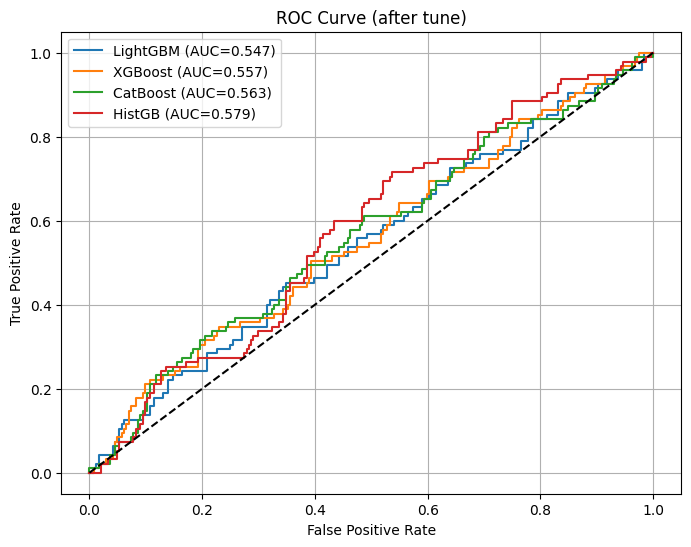

In [23]:
# -----------------------------
# 1. 데이터 로드
# -----------------------------
train = pd.read_csv('train_data.csv')
valid = pd.read_csv('valid_data.csv')

target = "IS_FAILED_TRIP"
X_train, y_train = train.drop(columns=[target]), train[target]
X_valid, y_valid = valid.drop(columns=[target]), valid[target]
neg, pos = y_train.value_counts().sort_index()
scale_pos_weight = neg / pos

# -----------------------------
# 2. Optuna 튜닝 함수 정의
# -----------------------------
def objective(trial, model_name):
    if model_name == "LightGBM":
        params = {
            "objective": "binary",
            "metric": "binary_logloss",
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "n_estimators": trial.suggest_int("n_estimators", 100, 500),
            "num_leaves": trial.suggest_int("num_leaves", 15, 63),
            "subsample": trial.suggest_float("subsample", 0.7, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),
            "is_unbalance": True,
            "verbose": -1
        }
        model = lgb.LGBMClassifier(**params, random_state=42)
    
    elif model_name == "XGBoost":
        params = {
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "n_estimators": trial.suggest_int("n_estimators", 100, 500),
            "subsample": trial.suggest_float("subsample", 0.7, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),
            "scale_pos_weight": scale_pos_weight,
            "eval_metric": "logloss",
            "random_state": 42
        }
        model = xgb.XGBClassifier(**params)
    
    elif model_name == "CatBoost":
        params = {
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "depth": trial.suggest_int("depth", 3, 10),
            "iterations": trial.suggest_int("iterations", 100, 500),
            "subsample": trial.suggest_float("subsample", 0.7, 1.0),
            "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
            "class_weights": [1.0, scale_pos_weight],
            "verbose": 0,
            "random_state": 42
        }
        model = CatBoostClassifier(**params)
    
    elif model_name == "HistGB":
        params = {
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "max_iter": trial.suggest_int("max_iter", 100, 500),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 10, 50),
            "class_weight": "balanced",
            "random_state": 42
        }
        model = HistGradientBoostingClassifier(**params)
    
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return f1_score(y_valid, preds)

# -----------------------------
# 3. Optuna 실행
# -----------------------------
best_models = {}
for model_name in ["LightGBM", "XGBoost", "CatBoost", "HistGB"]:
    print(f"\n튜닝 시작: {model_name}")
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective(trial, model_name), n_trials=30)
    print(f"{model_name} Best params:", study.best_params)
    
    # 최적 파라미터로 모델 재학습
    if model_name == "LightGBM":
        best_models[model_name] = lgb.LGBMClassifier(**study.best_params, random_state=42)
    elif model_name == "XGBoost":
        best_models[model_name] = xgb.XGBClassifier(**study.best_params)
    elif model_name == "CatBoost":
        best_models[model_name] = CatBoostClassifier(**study.best_params)
    else:
        best_models[model_name] = HistGradientBoostingClassifier(**study.best_params)
    
    best_models[model_name].fit(X_train, y_train)

# -----------------------------
# 4. 모델별 평가 & 시각화
# -----------------------------
plt.figure(figsize=(8, 6))
for name, model in best_models.items():
    y_prob = model.predict_proba(X_valid)[:, 1] if hasattr(model, "predict_proba") else None
    y_pred = model.predict(X_valid)
    print(f"\n--------------- {name} 최종 결과---------------")
    print(classification_report(y_valid, y_pred, digits=3))
    if y_prob is not None:
        auc = roc_auc_score(y_valid, y_prob)
        fpr, tpr, _ = roc_curve(y_valid, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
    print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve (after tune)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

```
--------------- LightGBM 최종 결과---------------
              precision    recall  f1-score   support

         0.0      0.737     0.791     0.763       244
         1.0      0.338     0.274     0.302        95

    accuracy                          0.646       339
   macro avg      0.537     0.532     0.533       339
weighted avg      0.625     0.646     0.634       339

Confusion Matrix:
 [[193  51]
 [ 69  26]]
```
- Recall(1) 27.4% → 4개 모델 중 1클래스 탐지 성능 ㄱ 
- Precision 낮아 FP 51건 / F1=0.30 균형은 아직 부족

```
--------------- XGBoost 최종 결과---------------
              precision    recall  f1-score   support

         0.0      0.742     0.918     0.821       244
         1.0      0.459     0.179     0.258        95

    accuracy                          0.711       339
   macro avg      0.601     0.548     0.539       339
weighted avg      0.663     0.711     0.663       339

Confusion Matrix:
 [[224  20]
 [ 78  17]]
```
- Accuracy 최고 (0.71) 
- 1클래스 Recall 17.9% → 놓치는 망한 여행 많음
- Precision=0.46 → 맞춘 건 절반 이상 맞음

```
--------------- CatBoost 최종 결과---------------
              precision    recall  f1-score   support

         0.0      0.720     0.959     0.822       244
         1.0      0.286     0.042     0.073        95

    accuracy                          0.702       339
   macro avg      0.503     0.501     0.448       339
weighted avg      0.598     0.702     0.613       339

Confusion Matrix:
 [[234  10]
 [ 91   4]]
```
- 1클래스 Recall 4.2% → 거의 못 잡음

```
--------------- HistGB 최종 결과---------------
              precision    recall  f1-score   support

         0.0      0.724     0.947     0.821       244
         1.0      0.350     0.074     0.122        95

    accuracy                          0.702       339
   macro avg      0.537     0.510     0.471       339
weighted avg      0.619     0.702     0.625       339

Confusion Matrix:
 [[231  13]
 [ 88   7]]
```
- CatBoost보다 1클래스 조금 더 잡지만 여전히 Recall 낮음 (7.4%)
- 전반적으로 XGB/LightGBM보다 약함

---

문제점

1 클래스(망한 여행) Recall 여전히 낮음
- LightGBM이 27%, 나머지는 20% 이하 → 놓치는 케이스가 너무 많음
- Confusion Matrix에서 FN(실패여행인데 0으로 예측)이 과반수 차지

Precision-Recall Trade-off
- LightGBM은 Recall 높지만 FP 많음 (정상 여행을 망했다고 예측)
- XGB/CatBoost/HistGB는 Precision 높지만 Recall 낮음 (보수적)

데이터 한계
- 20개의 변수만 사용 → 모델이 분류할 정보 부족 가능성
- 파생변수/상호작용 변수 부족 → 분류 경계 학습이 어렵다

--- 

- LightGBM 과 XGB 진행 (why : recall이 상대적으로 높고(놓치는 케이스가 많아 우리 목적에 맞지않음) 다른 모델보다 분류 성능 그나마 안정적)
- 정리 ) 1클래스 탐지율이 지나치게 낮아 후보에서 제외 / 두 모델에 집중하여 튜닝 및 앙상블 전략 적용 & rp 균형 최적화 하는 방향으로 성능 개선 진행 선택
- 임계치 + 불균형 추가 보정 + 피처엔지니어링 

defaultdict(<class 'collections.OrderedDict'>, {})
[ 44  37  37  20  51  78 124   8   6  34 124 167  50  78  90  49  79 204
 171  25]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

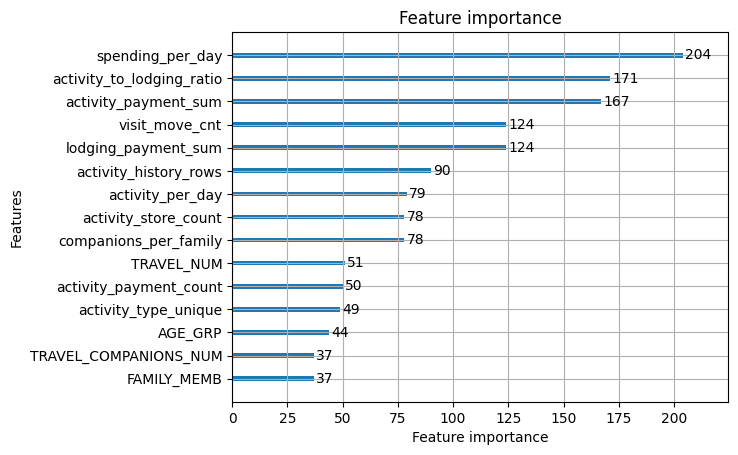

In [ ]:
lgb_model = best_models["LightGBM"]
print(lgb_model.best_score_)      
print(lgb_model.feature_importances_) 
lgb.plot_importance(lgb_model, max_num_features=15)


[0.04997921 0.04759675 0.04435713 0.04986463 0.04574387 0.04662933
 0.04949143 0.05311024 0.04399467 0.0484535  0.05844266 0.05390371
 0.04842522 0.05086061 0.04958859 0.04790203 0.0518816  0.05749327
 0.05510175 0.04717974]


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

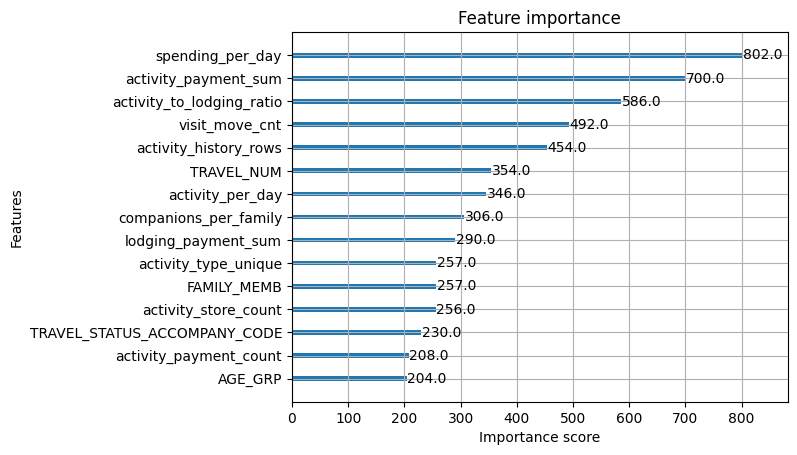

In [18]:
xgb_model = best_models["XGBoost"]
print(xgb_model.feature_importances_)
xgb.plot_importance(xgb_model, max_num_features=15)

| 변수                            | 의미            | 해석                                    |
| ----------------------------- | ------------- | ------------------------------------- |
| **spending_per_day**          | 1일 평균 지출      | 망한 여행과 가장 밀접. 여행 만족/불만족은 지출 규모와 강한 상관 |
| **activity_to_lodging_ratio** | 활동비 대비 숙박비 비율 | 숙박 중심 여행인지, 체험·활동 중심 여행인지 구분하는 핵심 지표  |
| **activity_payment_sum**      | 활동비 총합        | 활동 지출이 많을수록 만족도/망한 여부 구분에 도움          |
| **visit_move_cnt**            | 이동 횟수         | 이동이 많으면 피로 → 망한 여행 확률 ↑ 가능성           |
| **activity_history_rows**     | 활동 로그 수       | 여행 활동량 자체가 중요한 분류 지표                  |


- 두 모델 모두 여행의 지출 규모와 패턴, 활동/숙박 균형, 이동량 중요도 ㄱ

공통 중요 변수 보강
- spending_per_day → 구간화(저/중/고 소비)
- activity_to_lodging_ratio → 비율 log 변환 or 구간화

XGB가 강조한 변수 활용
- 동반 형태(가족여행/친구여행/단독여행) 더 정교하게 라벨링
- 여행 횟수 구간화 (1회, 2~3회, 4회 이상)
- 활동 다양성 지수 추가 (unique count / total count)

LGBM이 강조한 변수 활용
- 결제 건수 대비 금액 비율 (평균 결제액) 추가
- 장소 수 대비 총 지출 비율 추가 → 여행지 집중도 반영